In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
#Importing data
dataset = r'C:\Users\Beena Tiwari\Downloads\Bank_Personal_Loan_Modelling.xlsx'
df= pd.read_excel(dataset, sheet_name=1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [45]:
df.duplicated().sum() #Checking duplicated

0

In [47]:
df.isnull().sum() #checking for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [41]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [42]:
df['Experience'].unique() #converting to non-negative values

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [43]:
df['Experience'] = df['Experience'].abs()

In [44]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [48]:
y = df[['Personal Loan']]
X = df.drop('Personal Loan',axis = 1)

In [50]:
y.shape

(5000, 1)

In [51]:
X.shape

(5000, 13)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= 42)

In [53]:
X_train = ss.fit_transform(X_train)

In [54]:
X_test = ss.fit_transform(X_test)

In [55]:
X_test

array([[-0.65491626, -1.3605086 , -1.4393218 , ..., -0.25709547,
        -1.19218602,  1.55713119],
       [ 0.08094013,  0.11679379,  0.22069484, ..., -0.25709547,
        -1.19218602,  1.55713119],
       [ 0.12638011, -1.3605086 , -1.35195251, ..., -0.25709547,
         0.83879527, -0.64220665],
       ...,
       [ 0.50685517,  1.33339576,  1.44386501, ..., -0.25709547,
         0.83879527, -0.64220665],
       [ 0.1799586 , -1.09980818, -1.00247532, ..., -0.25709547,
        -1.19218602, -0.64220665],
       [-0.36667758, -1.3605086 , -1.26458321, ..., -0.25709547,
         0.83879527, -0.64220665]])

In [56]:
lr.fit(X_train,y_train)

C:\Users\Beena Tiwari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [57]:
y_pre= pd.DataFrame(lr.predict(X_train))

In [58]:
accuracy_score(y_train,y_pre)

0.9505

In [59]:
y_test_pre = pd.DataFrame(lr.predict(X_test))

In [60]:
accuracy_score(y_test,y_test_pre)

0.956

In [64]:
df = df.drop(['ZIP Code'],axis = 1) #Dropping ZIP Code column
df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,19,1,0,0,1,0,0,0
1,2,45,19,34,3,18,1,0,0,1,0,0,0
2,3,39,15,11,1,12,1,0,0,0,0,0,0
3,4,35,9,100,1,34,2,0,0,0,0,0,0
4,5,35,8,45,4,12,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,24,3,0,0,0,0,1,0
4996,4997,30,4,15,4,4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,5,2,0,0,0,0,1,0


In [66]:
x = df.drop(['Personal Loan'],axis = 1)
y = df['Personal Loan']

x.shape,y.shape

((5000, 12), (5000,))

In [67]:
#using train-test split procedure to estimate the performance of model.


x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

In [68]:
#seperating categorical and numerical variables

#x_train data
x_train_catg = x_train[['Family','Education']]
x_train_numr = x_train[['Age','Experience' ,'Income','CCAvg','Mortgage']]
x_train_data = x_train.drop(['Family','Education','Age','Experience' ,'Income','CCAvg','Mortgage'],axis = 1)    

#x_test data
x_test_catg = x_test[['Education','Family']]
x_test_numr = x_test[['Age','Experience','Income','CCAvg','Mortgage']]
x_test_data = x_test.drop(['Age','Experience','Income','CCAvg','Mortgage','Education','Family'],axis = 1)

x_train_numr.shape, x_train_catg.shape, x_train_data.shape, x_test_numr.shape, x_test_catg.shape, x_test_data.shape

((4000, 5), (4000, 2), (4000, 5), (1000, 5), (1000, 2), (1000, 5))

In [71]:
x_train_sc = sc.fit_transform(x_train_numr) #x_train data
x_train_sc = pd.DataFrame(x_train_sc, columns = ['Age','Experience','Income','CCAvg','Mortgage'])

In [72]:
x_test_sc = sc.fit_transform(x_test_numr) #x_test data
x_test_sc = pd.DataFrame(x_test_sc, columns = ['Age','Experience','Income','CCAvg','Mortgage'])

In [73]:
x_train_sc.shape ,x_test_sc.shape #checking current shape of array

((4000, 5), (1000, 5))

In [75]:
x_train_norm = pd.get_dummies(x_train_catg, columns = ['Family','Education'])

x_test_norm = pd.get_dummies(x_test_catg, columns = ['Family','Education'])

x_train_norm.shape,x_test_norm.shape
x_train_data_final = pd.concat([x_train_norm.reset_index(drop=True),x_train_sc.reset_index(drop=True),x_train_data.reset_index(drop=True)],axis = 1)

x_test_data_final = pd.concat([x_test_norm.reset_index(drop=True),x_test_sc.reset_index(drop=True),x_test_data.reset_index(drop=True)],axis = 1)

x_train_data_final.shape,x_test_data_final.shape


((4000, 17), (1000, 17))

In [81]:
model = LogisticRegression(random_state=0)
x_train_log = model.fit(x_train_data_final, y_train)
print(' Personal Loan (yes or no / 0 or 1 ) Binary form:', x_train_log.classes_)
print(' Intercept :',x_train_log.intercept_)
print(' Coefficients :',x_train_log.coef_)

 Personal Loan (yes or no / 0 or 1 ) Binary form: [0 1]
 Intercept : [-2.85212124]
 Coefficients : [[-1.45928392e+00 -1.71505484e+00  4.05061433e-01  1.05066920e-02
  -3.79445071e+00  4.96495832e-01  5.39184241e-01  4.52515066e-02
   1.41840224e-02  2.87090062e+00  4.61541718e-01  2.23428412e-01
   5.58411210e-05  3.92029171e-02  1.91051624e+00 -6.41889759e-01
  -4.44867849e-01]]


C:\Users\Beena Tiwari\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
import statsmodels.api as sm

sm_model = sm.Logit(y_train,sm.add_constant(x_train))
result = sm_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.129987
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3987
Method:                           MLE   Df Model:                           12
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.5932
Time:                        22:48:13   Log-Likelihood:                -519.95
converged:                       True   LL-Null:                       -1278.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.0826      1.751     -6.899      0.000     -15.515      -8.650
ID   

In [84]:
conf_matrix = confusion_matrix(y_test, y_test)
conf_matrix

array([[910,   0],
       [  0,  90]], dtype=int64)

In [85]:
report = classification_report(y_test, y_test)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       910\n           1       1.00      1.00      1.00        90\n\n    accuracy                           1.00      1000\n   macro avg       1.00      1.00      1.00      1000\nweighted avg       1.00      1.00      1.00      1000\n'

In [87]:
# Statsmodel Logistic regression
reduced_attributes = [ "Experience", "Income", "CCAvg", "Family",'Education','CreditCard'] #Making reduced model with statsmodel
model= sm.Logit(y_train, x_train[reduced_attributes])
red_result_sm_lg = model.fit(method='newton')

y_pred_sm_lg = (red_result_sm_lg.predict(x_train[reduced_attributes]) >= 0.5).astype(int)
confusion_mat_sm_lg = red_result_sm_lg.pred_table()



print(red_result_sm_lg.summary())
print("** ** "*15)
print(red_result_sm_lg.summary2())

Optimization terminated successfully.
         Current function value: 0.326289
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                -0.02107
Time:                        22:50:52   Log-Likelihood:                -1305.2
converged:                       True   LL-Null:                       -1278.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Experience    -0.0656      0.004    -14.606      0.000      -0.074      -0.057
Income         0.0105      0.

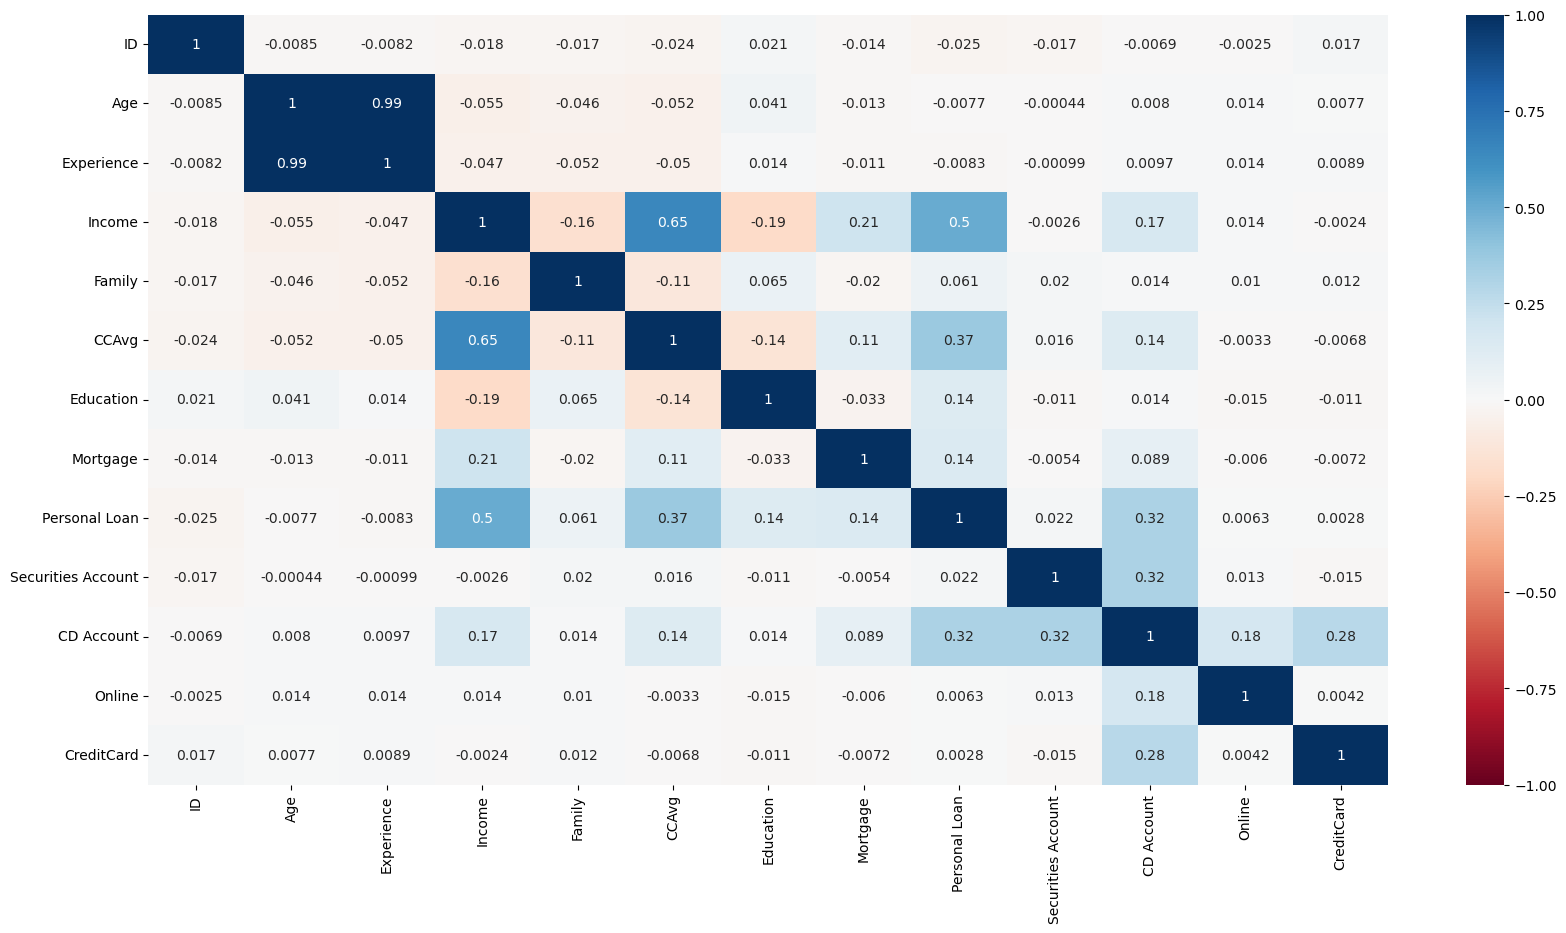

In [91]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))        
sns.heatmap(df.corr(),cmap='RdBu',vmin=-1,vmax=1,annot = True)
plt.show()